## Example of likelihood maximization with iMinuit

This notebook contains the basic syntax required to run iMinuit on simulated P1D data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
import time
# our own modules
from lace.emulator import gp_emulator
from lace.emulator import p1d_archive
from cup1d.data import data_MPGADGET
from cup1d.likelihood import lya_theory
from cup1d.likelihood import likelihood
from cup1d.likelihood import iminuit_minimizer

### Set up mock data

Begin by picking a simulation to use as mock data, and creating a corresponding data object

In [2]:
# specify simulation to use to generate synthetic data
test_sim_label="central"
if type(test_sim_label)==int:
    drop_sim_number=test_sim_label
    print('will drop sim number {} from emulator'.format(drop_sim_number))
else:
    drop_sim_number=None

In [3]:
# specify simulation suite and P1D mesurements
basedir="/lace/emulator/sim_suites/Australia20/"
z_max=4.5
emu_type="polyfit"
data=data_MPGADGET.P1D_MPGADGET(basedir=basedir,sim_label=test_sim_label,
                                zmax=z_max,polyfit=(emu_type=="polyfit"))

### Emulator and training set

Create a set of training data to train an emulator

In [4]:
# specify simulation suite and P1D mesurements
archive=p1d_archive.archiveP1D(basedir=basedir,drop_sim_number=drop_sim_number,z_max=z_max,
                            drop_tau_rescalings=True,drop_temp_rescalings=True)

In [5]:
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
kmax_Mpc=8
emu=gp_emulator.GPEmulator(basedir,z_max=z_max,
                                verbose=False,paramList=paramList,train=True,
                                asymmetric_kernel=True,rbf_only=True,
                                emu_type=emu_type,passarchive=archive,
                                kmax_Mpc=kmax_Mpc)

 /global/homes/f/font/.conda/envs/cup1d/lib/python3.9/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 330 points
GPs optimised in 0.39 seconds


### Set up a likelihood

Here we chose which parameters we want to sample, over which range and chose a prior. We pass the data and emulator objects to the likelihood.

In [6]:
#free_param_names=["As","ns","ln_tau_0"]
free_param_names=["As","ns","ln_tau_0","ln_tau_1","ln_sigT_kms_0","ln_sigT_kms_1","ln_gamma_0","ln_gamma_1"]

In [7]:
# option to include/remove a Gaussian prior (in unit cube)
prior_Gauss_rms=None
# option to include/ignore emulator covariance (it might bias the results)
emu_cov_factor=0
like=likelihood.Likelihood(data=data,emulator=emu,
                            free_param_names=free_param_names,
                            prior_Gauss_rms=prior_Gauss_rms,
                            emu_cov_factor=emu_cov_factor)

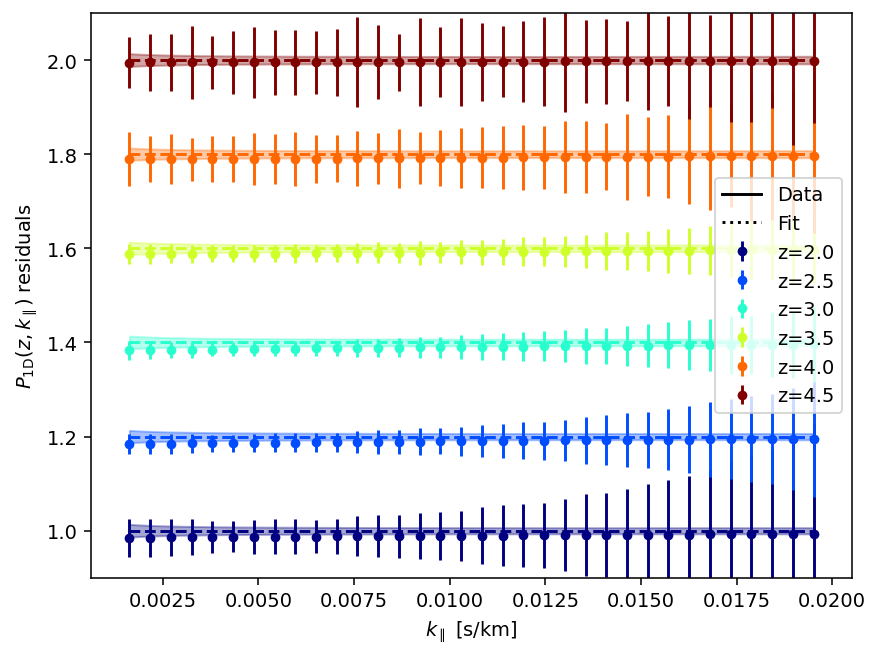

In [8]:
like.plot_p1d(residuals=True,plot_every_iz=2)

# Try iminuit minimizer

In [9]:
minimizer = iminuit_minimizer.IminuitMinimizer(like)

In [10]:
minimizer.minimize(compute_hesse=True)

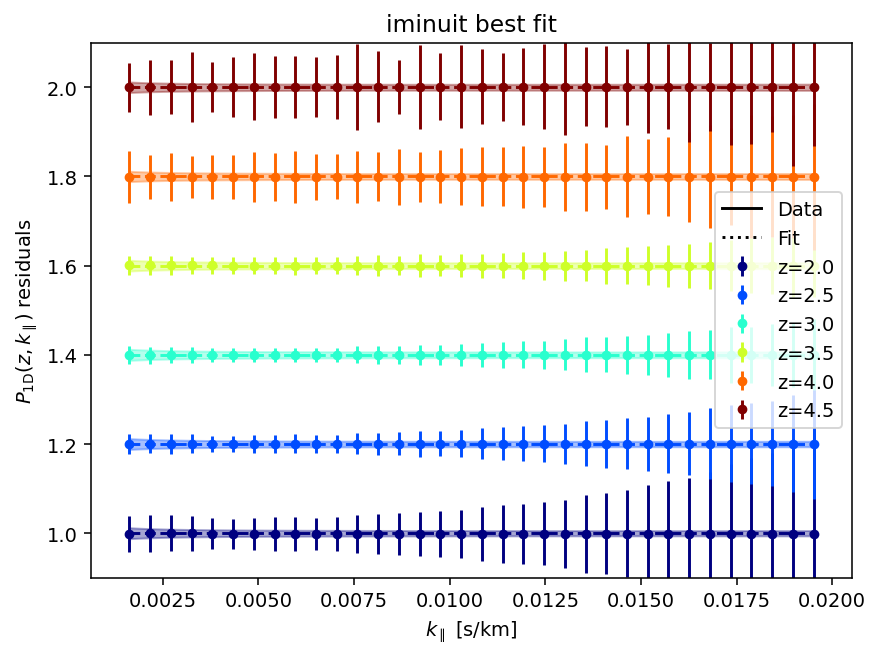

In [11]:
minimizer.plot_best_fit(plot_every_iz=2)

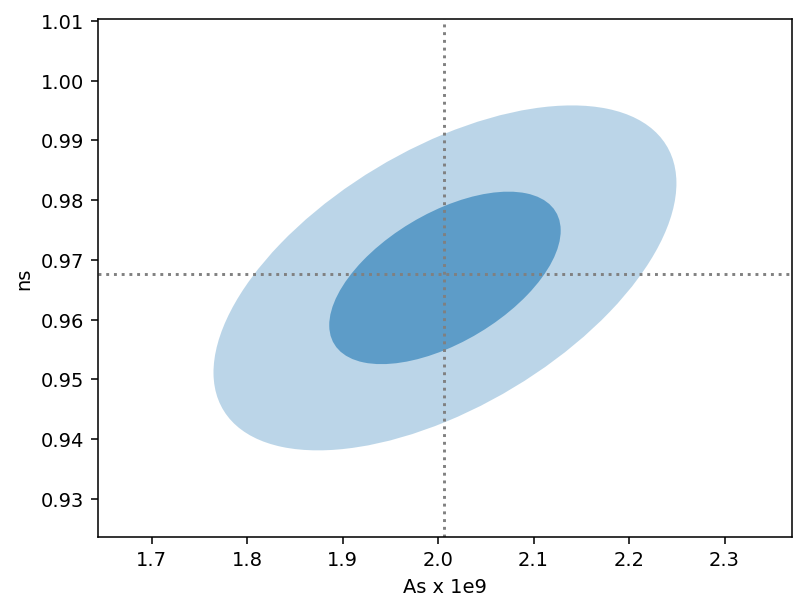

In [12]:
minimizer.plot_ellipses('As','ns')

### Access the actual minimizer object from iminuit

In [13]:
minimizer.minimizer.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 118.5                      │              Nfcn = 558              │
│ EDM = 1.51e-09 (Goal: 0.0001)    │            time = 6.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.46    │   0.05    │            │            │         │         │       │
│ 1 │ x1   │   0.51    │   0.09    │            │            │         │         │       │
│ 2 │ x2   │   0.52    │   0.30    │            │            │         │         │       │
│ 3 │ x3   │    0.5    │    0.4    │            │            │         │         │       │
│ 4 │ x4   │   0.49    │   0.13    │            │            │         │         │       │
│ 5 │ x5   │    0.5    │    0.6    │            │            │         │         │       │
│ 6 │ x6   │   0.49    │   0.23    │            │            │         │         │       │
│ 7 │ x7   │    0.4    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────┐
│    │       x0       x1       x2       x3       x4       x5       x6       x7 │
├────┼─────────────────────────────────────────────────────────────────────────┤
│ x0 │  0.00301  0.00255  -0.0127   0.0184  0.00421  -0.0226 -0.00679   0.0141 │
│ x1 │  0.00255  0.00724  -0.0177   0.0176  0.00513  -0.0245  -0.0135     0.01 │
│ x2 │  -0.0127  -0.0177   0.0898  -0.0954  -0.0355    0.107   0.0636   -0.068 │
│ x3 │   0.0184   0.0176  -0.0954    0.195   0.0348   -0.246  -0.0569    0.151 │
│ x4 │  0.00421  0.00513  -0.0355   0.0348   0.0158  -0.0357  -0.0254    0.026 │
│ x5 │  -0.0226  -0.0245    0.107   -0.246  -0.0357    0.346   0.0623   -0.173 │
│ x6 │ -0.00679  -0.0135   0.0636  -0.0569  -0.0254   0.0623   0.0512  -0.0347 │
│ x7 │   0.0141     0.01   -0.068    0.151    0.026   -0.173  -0.0347     0.14 │
└────┴─────────────────────────────────────────────────────────────────────────┘

In [14]:
#minimizer.minimizer.draw_mncontour("x0", "x1")

In [15]:
#minimizer.minimizer.draw_mnprofile("x0")